In [1]:
import pandas as pd

# Load the processed dataset
df = pd.read_csv("CICDDoS2019.csv")

# Display dataset structure
print(df.shape)
print(df.head())


(431371, 79)
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0        17             48                  2                       0   
1        17              2                  2                       0   
2        17              1                  2                       0   
3        17              1                  2                       0   
4        17              1                  2                       0   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                    2944.0                       0.0                 1472.0   
1                    2944.0                       0.0                 1472.0   
2                    2944.0                       0.0                 1472.0   
3                    2944.0                       0.0                 1472.0   
4                    2896.0                       0.0                 1448.0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length

In [2]:
# Drop non-informative columns
drop_cols = ["Active Mean", "Active Std", "Active Max", "Active Min", 
             "Idle Mean", "Idle Std", "Idle Max", "Idle Min"]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

print("Remaining Columns:", df.shape[1])  # Check column count


Remaining Columns: 71


In [3]:
# Convert "Label" into binary values (1 = Attack, 0 = Normal)
df["Label"] = df["Label"].apply(lambda x: 0 if "Benign" in str(x) else 1)

# Check new label distribution
print(df["Label"].value_counts())


Label
1    333540
0     97831
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
X = df.select_dtypes(include=['number']).drop(columns=["Label"])  # Features
y = df["Label"]  # Target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data successfully scaled!")


Data successfully scaled!


In [5]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (345096, 69)
Testing Set Size: (86275, 69)


Model Train


In [6]:
import tensorflow as tf

# Define the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"🔥 Model Test Accuracy: {accuracy * 100:.2f}%")


2025-02-13 19:44:13.736052: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 19:44:14.019242: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 19:44:14.158862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739475854.466802    8981 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739475854.553549    8981 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 19:44:15.190444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/10


2025-02-13 19:44:19.889489: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 95246496 exceeds 10% of free system memory.


10758/10785 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9926 - loss: 0.0281

2025-02-13 19:44:33.633054: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23811900 exceeds 10% of free system memory.


10785/10785 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9926 - loss: 0.0281 - val_accuracy: 0.9973 - val_loss: 0.0097
Epoch 2/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9973 - val_loss: 0.0094
Epoch 3/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9975 - val_loss: 0.0082
Epoch 4/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9978 - val_loss: 0.0077
Epoch 5/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 6/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.9979 - val_loss: 0.0082
Epoch 7/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9981 - val_loss: 0.0066
Epoch 8/10
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9978 - lo

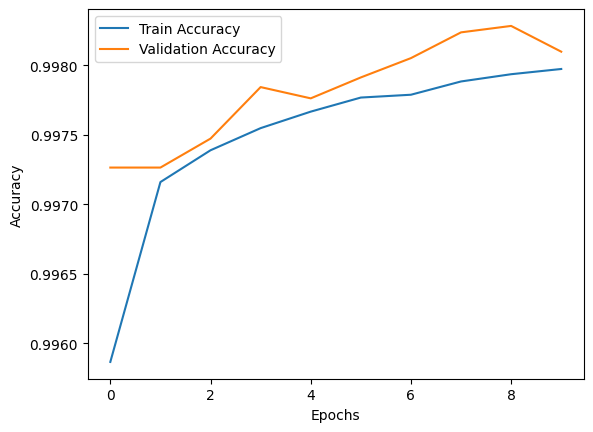

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1]:
import numpy as np

# Select a random test sample
random_sample = np.array([X_test[0]])  # Pick a test sample
prediction = model.predict(random_sample)

# Print result
if prediction[0][0] > 0.5:
    print("🚨 ALERT: DDoS Attack Detected!")
else:
    print("✅ Normal Traffic.")


NameError: name 'X_test' is not defined

In [3]:
import pandas as pd

df = pd.read_csv("DDoS_Dataset_v1.csv")
print(df["Label"].value_counts())  # 🔍 Check class distribution


Label
1    45095
0    45095
Name: count, dtype: int64


In [1]:
import tensorflow as tf
import pickle

# Save the trained model
model.save("Models/ddos_model.h5")
print("✅ Model saved successfully!")

# Save the StandardScaler
with open("Models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved successfully!")


2025-02-14 21:06:32.375090: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 21:06:32.378366: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 21:06:32.387285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739567192.401896   25138 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739567192.407167   25138 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 21:06:32.423569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
import pickle

# Load AI model
model = tf.keras.models.load_model("Models/ddos_model.h5")

# Load Scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Print expected number of features
print(f"🔥 Model expects {model.input_shape[1]} features")
print(f"🔥 Scaler expects {scaler.n_features_in_} features")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'ddos_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
from sklearn.utils import resample

# ✅ Load dataset
df = pd.read_csv("DDoS_Dataset_v1.csv")

# ✅ Separate attack & normal traffic
df_attack = df[df["Label"] == 1]
df_normal = df[df["Label"] == 0]

# ✅ Balance dataset (equal attack & normal samples)
df_attack_balanced = resample(df_attack, replace=True, n_samples=len(df_normal), random_state=42)
df_balanced = pd.concat([df_attack_balanced, df_normal])

# ✅ Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# ✅ Save balanced dataset
df_balanced.to_csv("DDoS_Dataset_v1.csv", index=False)
print(f"🔥 Balanced Dataset Saved: {df_balanced['Label'].value_counts()}")


df.head(100)

🔥 Balanced Dataset Saved: Label
1    45095
0    45095
Name: count, dtype: int64


,URG Flag Count,Bwd Packet Length Max,Packet Length Min,Bwd Packets Length Total,Fwd Packet Length Min,Fwd Act Data Packets,Bwd Packets/s,Subflow Bwd Bytes,Init Bwd Win Bytes,Down/Up Ratio,...,Flow Bytes/s,RST Flag Count,Fwd IAT Max,Fwd Packets/s,Flow IAT Max,Fwd IAT Total,Packet Length Max,Subflow Fwd Bytes,Flow Packets/s,Label
0,0,0.0,330.0,0.0,330.0,3,0.000000,0,-1,0.0,...,1.283405e+04,0,108927.0,36.721170,108927.0,108929.0,369.0,1398,36.721167,1
1,0,6.0,6.0,12.0,6.0,1,19607.844000,12,0,1.0,...,2.352941e+05,0,46.0,19607.844000,56.0,46.0,6.0,12,39215.686275,1
2,0,6.0,6.0,24.0,6.0,9,0.067711,24,0,0.0,...,1.421929e+00,0,20175560.0,0.169277,20175560.0,59074690.0,6.0,60,0.236988,1
3,1,46.0,0.0,184.0,0.0,7,0.053577,184,252,0.0,...,4.661169e+00,1,58285736.0,0.116083,58285736.0,111989080.0,46.0,338,0.169659,0
4,0,66.0,50.0,132.0,50.0,1,97.361500,132,-1,1.0,...,1.129393e+04,0,3.0,97.361500,20536.0,3.0,66.0,100,194.723007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.0,0.0,0.0,6.0,2,0.403689,0,242,0.0,...,3.633205e+00,0,4954300.0,0.605534,4913290.0,4954303.0,6.0,18,1.009224,0
96,0,0.0,432.0,0.0,432.0,1,0.000000,0,-1,0.0,...,1.728000e+07,0,50.0,40000.000000,50.0,50.0,432.0,864,40000.000000,1
97,0,6.0,6.0,24.0,6.0,9,0.066667,24,0,0.0,...,1.399997e+00,0,23259606.0,0.166666,23259606.0,60000040.0,6.0,60,0.233333,1
98,0,0.0,330.0,0.0,330.0,3,0.000000,0,-1,0.0,...,1.323087e+04,0,105660.0,37.856560,105660.0,105662.0,369.0,1398,37.856561,1


In [7]:
import requests

API_URL = "http://127.0.0.1:8000/predict"

# ✅ Normal Traffic Example
normal_traffic = {
    "features": [
        0, 1500, 60, 50000, 60, 5, 250, 10000, 3000, 1.2, 750, 2000, 10000, 750, 150, 50,
        500, 800, 1500, 200, 2, 10000, 1, 250, 50, 300, 750, 
    ]
}

# 🚨 Simulated DDoS Attack
ddos_attack = {
    "features": [
        10, 65535, 1, 9999999, 1, 1000, 100000, 9999999, 65535, 100,
        60000, 65535, 9999999, 60000, 0.1, 0.01, 60000, 65000, 65535, 0.01,
        20, 9999999, 50, 100000, 99999, 99999, 99999]
    
}

print("🚀 Sending Normal Traffic Request...")
normal_response = requests.post(API_URL, json=normal_traffic)
print("✅ Normal Traffic Response:", normal_response.json())

print("\n🚀 Sending Simulated DDoS Attack Request...")
ddos_response = requests.post(API_URL, json=ddos_attack)
print("🚨 DDoS Attack Response:", ddos_response.json())


🚀 Sending Normal Traffic Request...
✅ Normal Traffic Response: {'alert': '✅ Normal Traffic', 'confidence': 0.0015958377625793219}

🚀 Sending Simulated DDoS Attack Request...
🚨 DDoS Attack Response: {'alert': '✅ Normal Traffic', 'confidence': 2.6265236101608025e-06}


In [ ]:
import requests

API_URL = "http://127.0.0.1:8000/predict"

# 🚀 Example Test Data (28 features)
sample_data = {
    "features": [0.2, -0.1, 0.5, -0.3, 0.7, -0.8, 0.3, -0.5, 0.1, -0.6, 0.4, -0.2, 0.8, -0.4, 0.6, -0.9, 0.7, -0.7, 0.9, -0.2, 0.5, -0.3, 0.2, -0.1, 0.3, -0.6, 0.7, -0.8]
}

response = requests.post(API_URL, json=sample_data)
print(response.json())


{'error': 'Expected 28 features, but received 30'}


In [8]:
import tensorflow as tf

model = tf.keras.models.load_model("cnn_lstm_model_v2.keras")

print(f"Model Input Shape: {model.input_shape}")


2025-02-14 20:33:04.762609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 20:33:04.765768: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 20:33:04.774577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739565184.789749    2324 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739565184.794026    2324 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 20:33:04.810247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Model Input Shape: (None, 27, 1)


2025-02-14 20:33:07.526491: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
import tensorflow as tf
import numpy as np
import pickle

# Load Model
model = tf.keras.models.load_model("cnn_lstm_model_v2.keras")

# Load Scaler
scaler = pickle.load(open("Data/scaler_v2.pkl", "rb"))

# Example Normal Traffic Data
sample_data = np.array([
    [0.1, -0.2, 0.05, -0.1, -0.3, 0.15, 1.2, 0.2, 0.1, -0.09,
    -0.02, -0.25, 0.1, -0.26, -0.23, -0.18, -0.29, -0.03, -0.25, -0.47,
    -0.51, -0.06, -0.28, -0.58, -0.09, -0.02, 0.8]
])

# Normalize
sample_data = scaler.transform(sample_data)

# Reshape for LSTM
sample_data = np.expand_dims(sample_data, axis=-1)

# Predict
prediction = model.predict(sample_data)[0][0]
print(f"🔥 Model Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
🔥 Model Prediction: 1.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:

import pickle
import pandas as pd

# 🚀 Load Fixed Dataset
df = pd.read_csv("../Data/DDoS_Dataset_v2.csv")

# ✅ Load Scaler
scaler = pickle.load(open("../Models/scaler_v2.pkl", "rb"))

print(f"Dataset Features: {df.shape[1]}")
print(f"Scaler Expected Features: {scaler.n_features_in_}")


Dataset Features: 27
Scaler Expected Features: 26


c:\Users\naksh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
import pandas as pd

df = pd.read_csv("Data/DDoS_Dataset_v2.csv")

print(df["Label"].value_counts())  # Check label distribution
print(df.head())  # Check first few rows


Label
1    97831
0    97831
Name: count, dtype: int64
   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0      -0.255397          -0.072027               -0.057648   
1      -0.368053          -0.072027               -0.057648   
2      -0.372189          -0.081711               -0.057648   
3      -0.372184           0.053872               -0.057648   
4      -0.249653          -0.072027               -0.057648   

   Fwd Packets Length Total  Bwd Packets Length Total  Packet Length Max  \
0                 -0.098205                 -0.022748           0.157169   
1                 -0.112088                 -0.022748          -0.014762   
2                 -0.113507                 -0.022748           0.388666   
3                  0.132792                 -0.022748           0.054281   
4                 -0.098205                 -0.022748           0.157169   

   Packet Length Min  Flow IAT Mean  Flow IAT Std  Flow IAT Max  ...  \
0           1.242688       0.238427   

In [20]:
import pickle
import pandas as pd

df = pd.read_csv("Data/DDoS_Dataset_v2.csv")
scaler = pickle.load(open("Data/scaler_v2.pkl", "rb"))

print(f"Dataset Features: {df.shape[1]}")
print(f"Scaler Expected Features: {scaler.n_features_in_}")


Dataset Features: 27
Scaler Expected Features: 26


In [24]:
import requests

API_URL = "http://127.0.0.1:8000/predict"

# 🚀 Example Test Data (28 features)
sample_data = {
    "features": [0.2, -0.1, 0.5, -0.3, 0.7, -0.8, 0.3, -0.5, 0.1, -0.6, 0.4, -0.2, 0.8, -0.4, 0.6, -0.9, 0.7, -0.7, 0.9, -0.2, 0.5, -0.3, 0.2, -0.1, 0.3, -0.6]
}

response = requests.post(API_URL, json=sample_data)
print(response.json())


{'alert': '🚨 DDoS Attack Detected!', 'confidence': 0.9999406337738037}


In [11]:
import pickle
import pandas as pd

# Load dataset
df = pd.read_csv("Data/DDoS_Dataset_v2.csv")
print(f"Dataset Columns ({len(df.columns)}):", df.columns)

# Load scaler
scaler = pickle.load(open("Data/scaler_v2.pkl", "rb"))
print(f"Scaler Expected Features: {scaler.n_features_in_}")


Dataset Columns (28): Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Packet Length Max', 'Packet Length Min', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Bwd IAT Total', 'Bwd IAT Mean', 'Flow Bytes/s',
       'Flow Packets/s', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Bwd Packets/s', 'Fwd Packets/s', 'Down/Up Ratio',
       'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Protocol', 'Label'],
      dtype='object')
Scaler Expected Features: 27


In [13]:
import pickle
import pandas as pd

# Load dataset
df = pd.read_csv("Data/DDoS_Dataset_v2.csv")
print(f"Dataset Columns ({len(df.columns)}):", df.columns.tolist())

# Load scaler
scaler = pickle.load(open("Data/scaler_v2.pkl", "rb"))
expected_features = scaler.feature_names_in_ if hasattr(scaler, "feature_names_in_") else None
print(f"Scaler Expected Features ({scaler.n_features_in_}):", expected_features)

# Compare and find mismatches
dataset_features = df.columns[:-1]  # Exclude Label
if expected_features:
    missing_in_scaler = set(dataset_features) - set(expected_features)
    extra_in_scaler = set(expected_features) - set(dataset_features)

    print("\n🔍 Features in dataset but NOT in scaler:", missing_in_scaler)
    print("❌ Features in scaler but NOT in dataset:", extra_in_scaler)


Dataset Columns (28): ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Packet Length Max', 'Packet Length Min', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Bwd IAT Total', 'Bwd IAT Mean', 'Flow Bytes/s', 'Flow Packets/s', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Bwd Packets/s', 'Fwd Packets/s', 'Down/Up Ratio', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Protocol', 'Label']
Scaler Expected Features (27): ['Flow Duration' 'Total Fwd Packets' 'Total Backward Packets'
 'Fwd Packets Length Total' 'Bwd Packets Length Total' 'Packet Length Max'
 'Packet Length Min' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Total' 'Fwd IAT Mean' 'Bwd IAT Total'
 'Bwd IAT Mean' 'Flow Bytes/s' 'Flow Packets/s' 'SYN Flag Count'
 'RST Flag Count' 'ACK Flag Count' 'URG Flag Count' 'Bwd Packets/s'
 'Fwd Packets/s' 'Down/Up Ratio' 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Load latest dataset
df = pd.read_csv("Data/DDoS_Dataset_v2.csv")

# ✅ Ensure correct feature selection (EXCLUDE LABEL)
feature_columns = df.columns[:-1]

# ✅ Train a new StandardScaler
scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# 💾 Save the updated scaler
pickle.dump(scaler, open("Data/scaler_v2.pkl", "wb"))
print("✅ FIXED: Scaler retrained and saved as `scaler_v2.pkl`!")

# 💾 Save the updated dataset (normalized)
df.to_csv("Data/DDoS_Dataset_v2.csv", index=False)
print("✅ FIXED: Dataset saved again with the correct features!")


✅ FIXED: Scaler retrained and saved as `scaler_v2.pkl`!
✅ FIXED: Dataset saved again with the correct features!


In [ ]:
import pandas as pd
import pickle

# ✅ Load Dataset
df = pd.read_csv("Data/DDoS_Dataset_v2.csv")
print(f"🔥 Dataset Features: {len(df.columns) - 1} (Excluding Label)")

# ✅ Load Scaler
scaler = pickle.load(open("Data/scaler_v2.pkl", "rb"))
print(f"🔥 Scaler Expected Features: {scaler.n_features_in_}")


🔥 Dataset Features: 26 (Excluding Label)
🔥 Scaler Expected Features: 26


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("../Models/cnn_lstm_xgb_model_v1.keras")
print(f"🔥 LSTM Feature Extraction Shape: {X_train_embeddings.shape}")

print(f"🔥 Model Input Shape: {model.input_shape}")


ValueError: File format not supported: filepath=../Models/xgb_classifier.pkl. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(../Models/xgb_classifier.pkl, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).